In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import pandas as pd
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat
import warnings as warn

import IfA_Smeargle as ifas

In [2]:
first_run = ifas.yankee.SmeargleConfig('FirstRun.ifaspkl')

first_run.BravoConfig.voltpat_rename_config['archive_data'] = False
first_run.BravoConfig.detector_name = {'name': 'SAPHIRA-MK20-M12145-40_20190416_T60K'}

if (True):
    first_run.BravoConfig.voltpat_rename_config['voltage_pattern'] = [2.5, 2.5, 2.5, 2.5,
                                                                 4.5, 4.5, 4.5, 4.5,
                                                                 6.5, 6.5, 6.5, 6.5,
                                                                 8.5, 8.5, 8.5, 8.5,
                                                                 9.5, 9.5, 9.5, 9.5,
                                                                 10.5, 10.5, 10.5, 10.5,
                                                                 11.5, 11.5, 11.5, 11.5,
                                                                 11.5, 11.5, 11.5, 11.5,
                                                                 10.5, 10.5, 10.5, 10.5,
                                                                 9.5, 9.5, 9.5, 9.5,
                                                                 8.5, 8.5, 8.5, 8.5,
                                                                 6.5, 6.5, 6.5, 6.5,
                                                                 4.5, 4.5, 4.5, 4.5,
                                                                 2.5, 2.5, 2.5, 2.5]
    first_run.BravoConfig.voltpat_rename_config['begin_garbage'] = 0

print(first_run)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'SAPHIRA-MK20-M12145-26_20190505_T60K'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 2.5, 2.5, 2.5, 4.5, 4.5, 4.5, 4.5, 6.5, 6.5, 6.5, 6.5, 8.5, 8.5, 8.5, 8.5, 9.5, 9.5, 9.5, 9.5, 10.5, 10.5, 10.5, 10.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5, 10.5, 10.5, 10.5, 10.5, 9.5, 9.5, 9.5, 9.5, 8.5, 8.5, 8.5, 8.5, 6.5, 6.5, 6.5, 6.5, 4.5, 4.5, 4.5, 4.5, 2.5, 2.5, 2.5, 2.5], 'begin_garbage': 0, 'archive_data': False}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:90: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled. 
File name: ./Data\SAPHIRA-MK20-M12145-26_20190505_T60K__num;40__detBias;9.5Vdown.fits    Null frames: [74 75].
  .format(f_name=file_name, fr_list=nan_frames)))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:90: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled. 
File name: ./Data\SAPHIRA-MK20-M12145-26_20190505_T60K__num;40__detBias;9.5Vdown.fits    Null frames: [74 75].
  .format(f_name=file_name, fr_list=nan_frames)))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:90: DataWarning: This a 3D data frame with nan/null values. Frames with nan/null values have been completely nulled. 
File name: ./Data\SAPHIRA-MK20-M12145-26_20190505_T60K__num;40__detBias;9.5Vdown.fits    Null frames: [74 75].
  .format

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:142: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extensio

KeyError: 'voltage_set2'

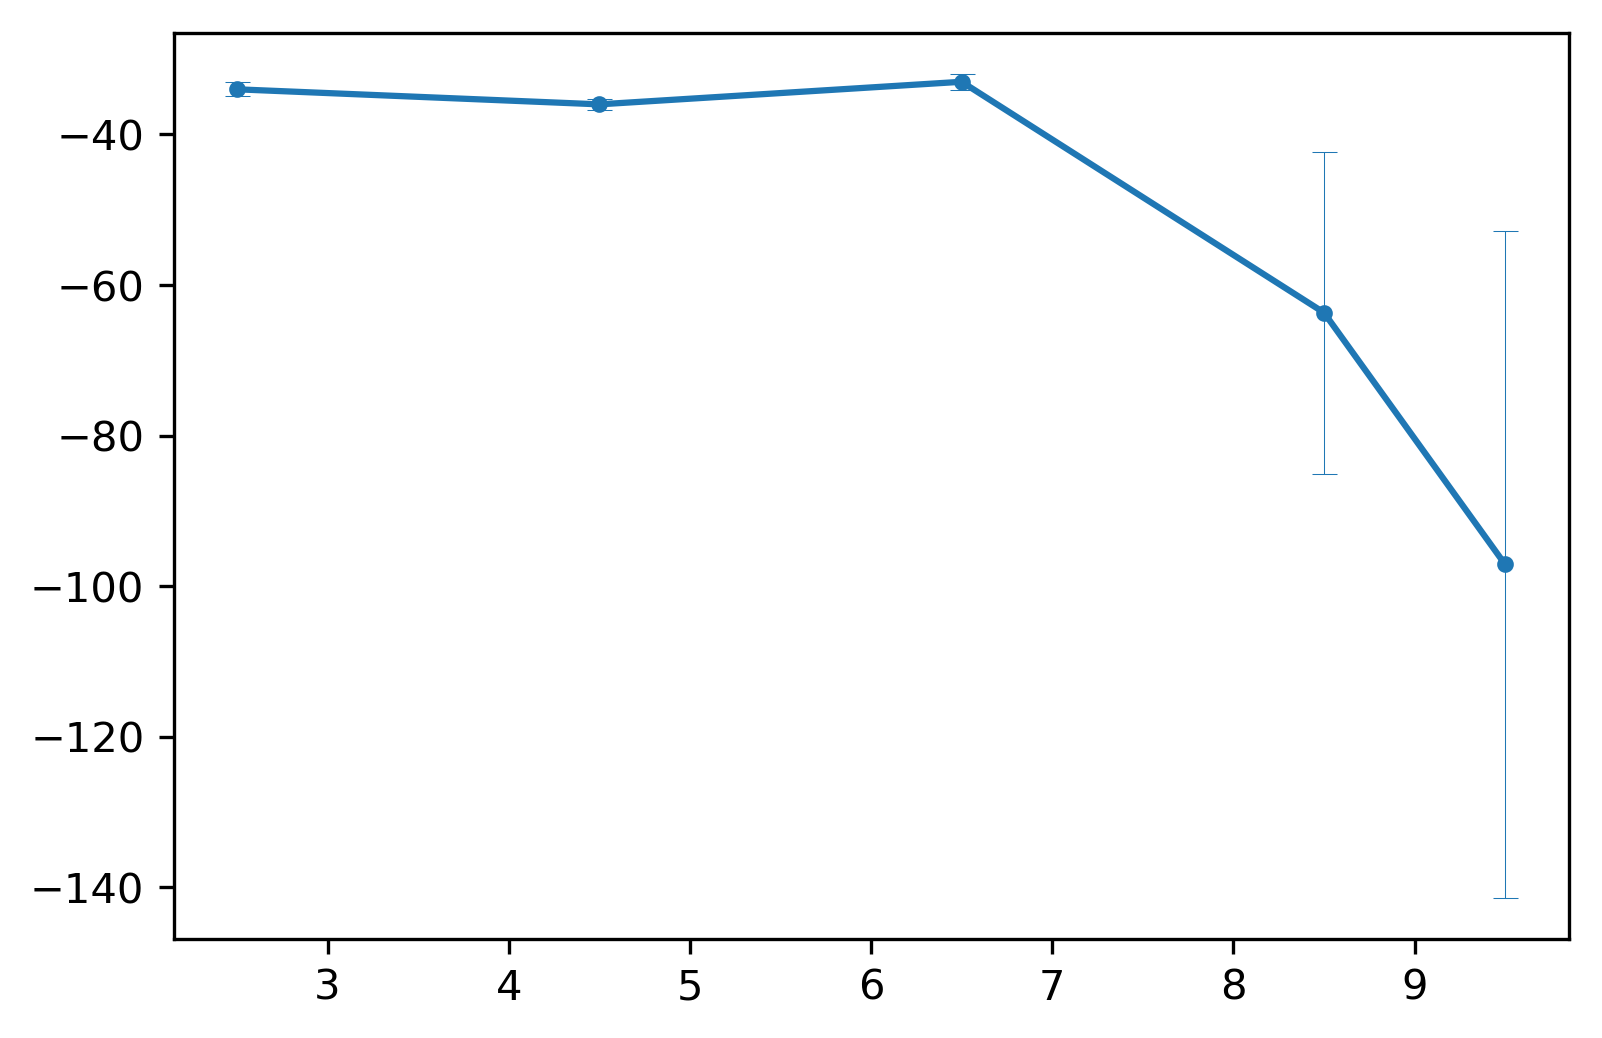

In [3]:
ifas.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/Saphria__num;19__detBias;8.5Vup__1025-1040.fits")

In [ ]:
data
print(np.nanmean(data.data),np.nanstd(data.data))

In [ ]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-1000,1000]

figure = ifas.oscar.multi.plot_single_heatmap_and_histogram("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits",first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

In [ ]:
first_run.OscarConfig.general_histogram_config['fit_gaussian'] = True
#first_run.OscarConfig.general_histogram_config['bin_width'] = 5
#first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-250,100]

__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/SAPHIRA-MK12145-02_20190913-40K__num;7__detBias;10.5Vup__slice;513-528.fits")
figure2 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data,first_run)
#figure3 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data.data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)
plt.show(figure3)

# [ 72 120 136 250 294]
#[-16074. -14058. -13386.  -8598.  -6750.]
ifas.meta.meta_plting.smeargle_save_figure_file(figure2,"website.png")
print(np.histogram(data.data,bins=10))

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;14__detBias;4.5Vdown__257-272.fits")
figure2 = ifas.oscar.histograms.plot_array_histogram(data.data,bin_width=10,fit_gaussian=True)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

wee, weer = ifas.meta.meta_model.smeargle_fit_histogram_gaussian_function(data.data)

print(np.nanstd(data))

In [ ]:
# Extract histogram data from the data.
hist_data = np.histogram(data.data, bins=ifa.oscar.oscar_bin_width(data.data, 10))
hist_x = (hist_data[1][0:-1] + hist_data[1][1:]) / 2 # Middle of bin.
hist_y = hist_data[0]
   # Filter out some of the outlier pixels, consider only 75% of the 
    # meaningful bins and the bins with a value greater than a limiting entry.
valuecut_index = np.where(hist_y >= 11)
cuthist_x = np.array(hist_x[valuecut_index])
cuthist_y = np.array(hist_y[valuecut_index])

    # Initial guesses...
    # The peak of the data is a good guess for the mean value.
guess_mean = hist_x[np.argmax(cuthist_y)]
print(np.nanstd(cuthist_y))
print(sp_stat.median_absolute_deviation(cuthist_y))
print(sp_stat.variation(cuthist_y))

In [ ]:
ifas.bravo.sanitize.same_file_size_sanitization('./Data')

In [ ]:
glob.glob('./Data*.fits')

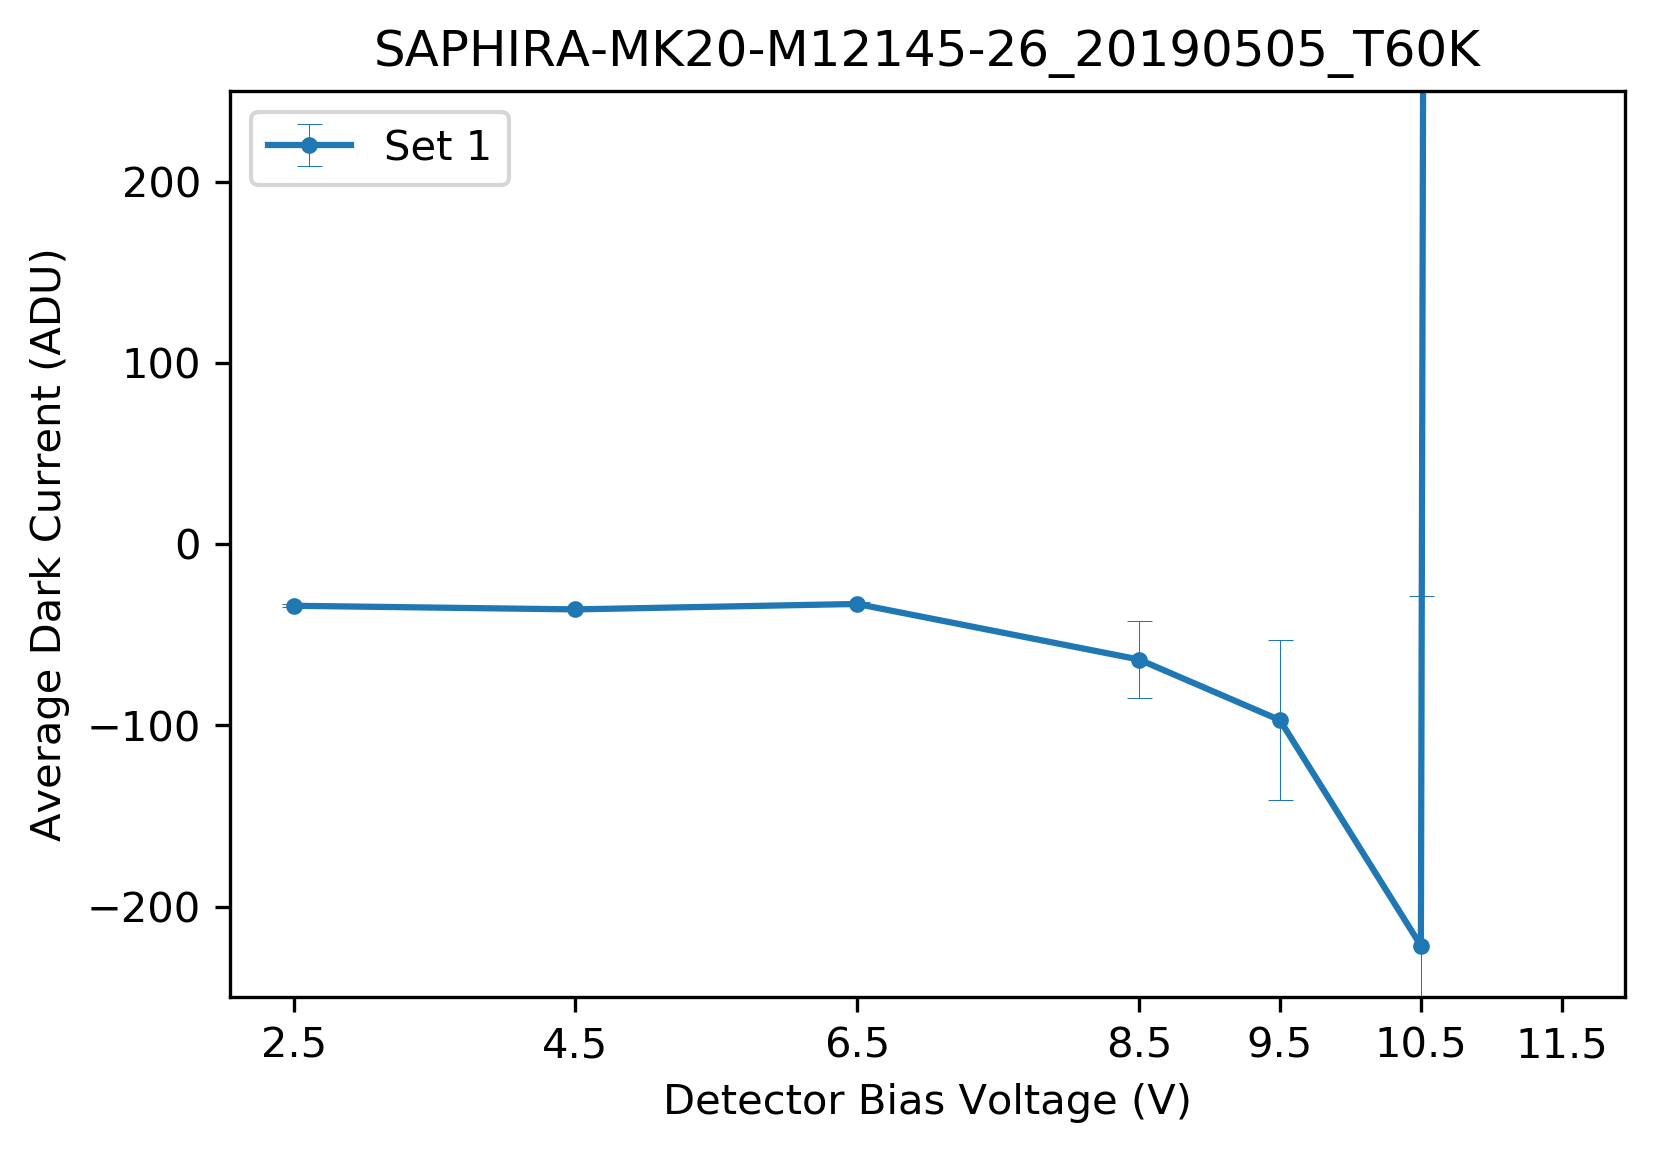

In [4]:
fig, ax = plt.subplots(dpi=300)
ax, data_table, data_frame = ifas.oscar.volt_plot.plotdir_dark_current_over_voltage('./Data/', figure_axes=ax)

#ax.set_yscale('log')
ax.set_ylim((-250,250))

plt.show()

In [5]:
data_table

{'voltage_set1': array([ 2.5,  4.5,  6.5,  8.5,  9.5, 10.5, 11.5]),
 'value_set1': array([  -34.        ,   -36.        ,   -33.        ,   -63.6683301 ,
          -97.13086549,  -221.59916943, 30550.14402726]),
 'error_set1': array([9.06423688e-01, 7.68769106e-01, 1.03111390e+00, 2.13751334e+01,
        4.42607914e+01, 1.92932838e+02, 9.53312233e+03])}

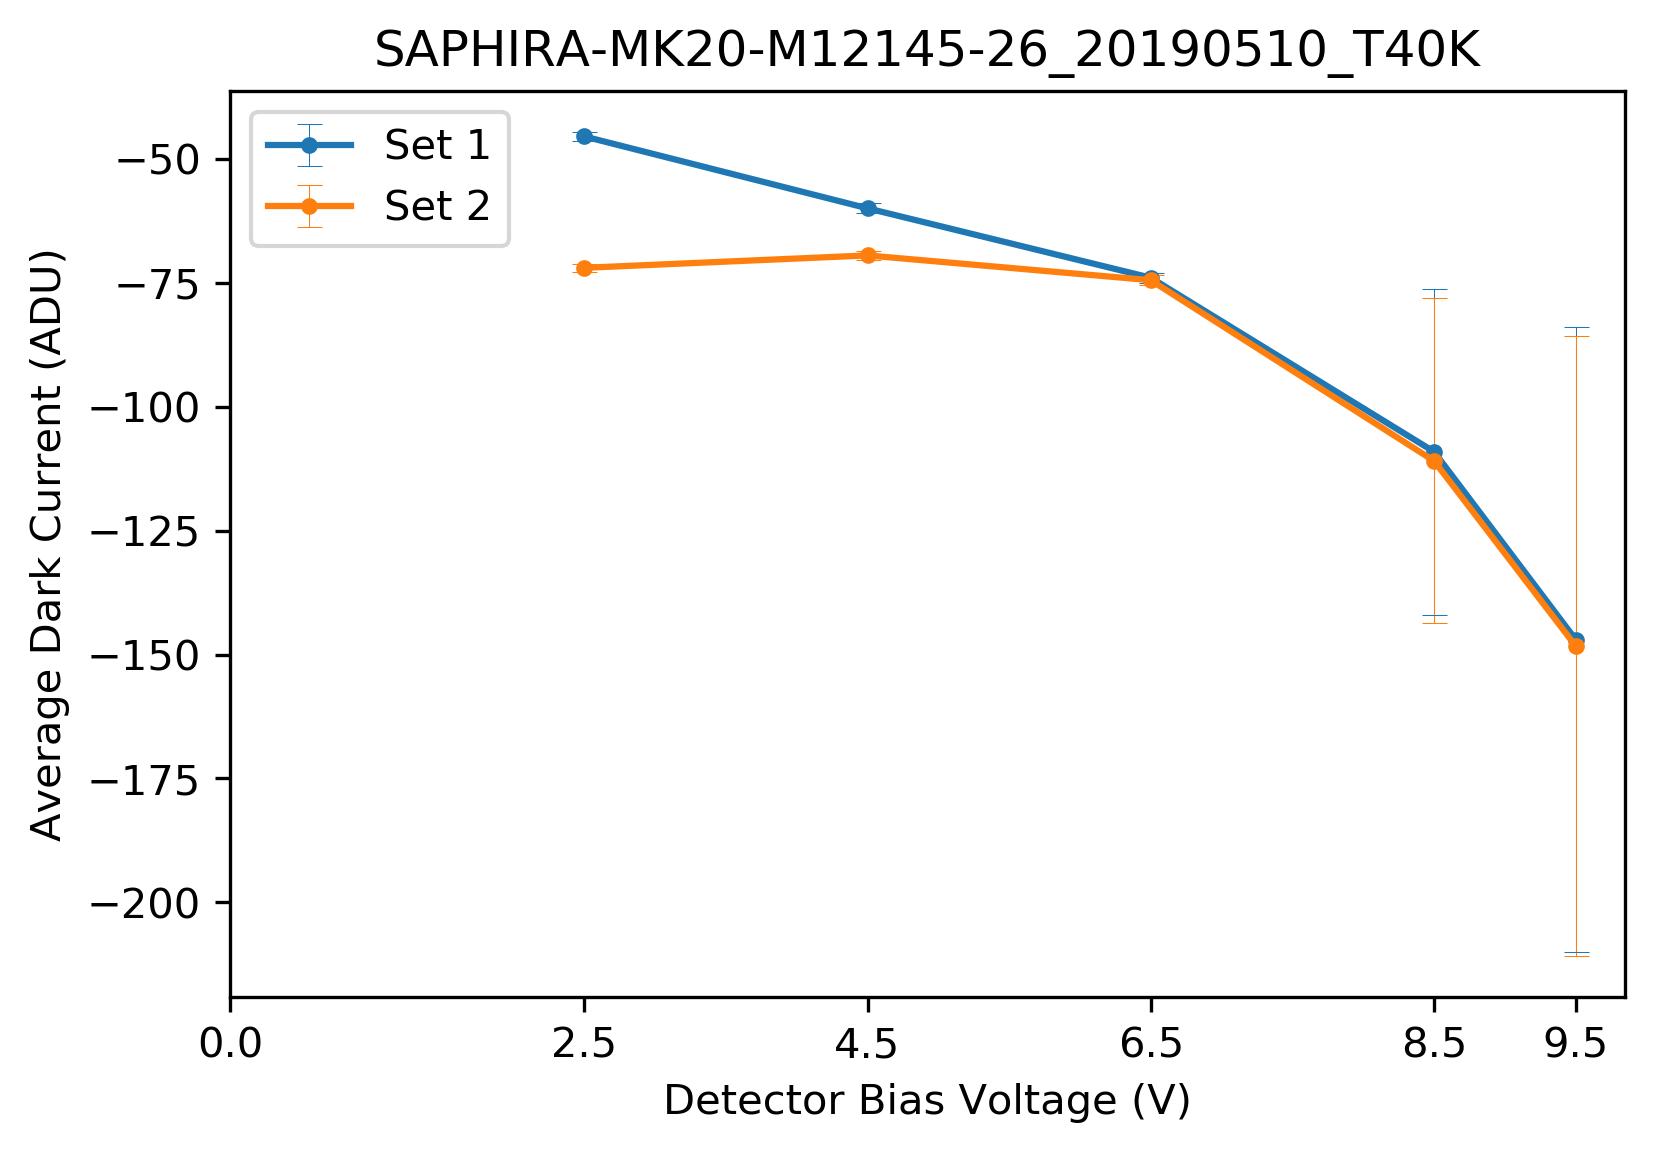

In [23]:
fig2, ax2 = plt.subplots(dpi=300)

ax2.errorbar(data_table['voltage_set1'][0:5], data_table['value_set1'][0:5], yerr=data_table['error_set1'][0:5],
                    fmt='.-', elinewidth=0.25, capsize=3, capthick=0.25,
                    label=('Set ' + str(1)))
ax2.errorbar(data_table['voltage_set2'][0:5], data_table['value_set2'][0:5], yerr=data_table['error_set2'][0:5],
                    fmt='.-', elinewidth=0.25, capsize=3, capthick=0.25,
                    label=('Set ' + str(2)))

title=first_run.BravoConfig.detector_name['name']
ax2.set_title(title)
ax2.legend(loc='upper left')
ax2.set_xticks(np.append(data_table['voltage_set1'][0:5], 0))
ax2.set_xlabel('Detector Bias Voltage (V)')
ax2.set_ylabel('Average Dark Current (ADU)')

plt.show()


In [22]:
np.append(data_table['voltage_set1'][0:5], 0)

array([2.5, 4.5, 6.5, 8.5, 9.5, 0. ])

In [ ]:
dataframe.query('volt == @voltage_value and voltslope == @voltage_slope')['num']

In [ ]:
voltage_list = copy.deepcopy(np.sort(np.unique(file_data.loc[:,'volt'].to_numpy())))

set_metadata = []
#slope_list = list(set(dataframe.query('volt == @voltage_value')['voltslope']))

for voltdex in voltage_list:
    slope_list = list(set(file_data.query('volt == @voltdex')['voltslope']))
    
    for slopedex in slope_list:
        query = file_data.query('volt == @voltdex and voltslope == @slopedex')['num']
        filenum = np.sort(np.unique(query))
        
        for numdex, setdex in zip(filenum,np.arange(len(filenum))+1):
            temp_dict = {'metavolt':voltdex,'metaslope':slopedex,'metanum':numdex,'metaset':setdex}
            set_metadata.append(temp_dict)
            
set_metadata = pd.DataFrame(set_metadata)

In [ ]:
set_count = np.flip(np.unique(set_metadata['metaset']))[np.flip(np.unique(set_metadata['metaset'],return_counts=True)[1]).argmax()]

for setdex in (np.arange(set_count) + 1):
    dataset_list = set_metadata.query('metaset == @setdex')
    
    x_axis_voltage = []
    y_axis_data = []
    y_axis_error = []
    
    for voltdex in voltage_list:
        fits_file_numbers = list(dataset_list.query('metavolt == @voltdex')['metanum'].to_numpy())
        voltset_data = file_data.query('num == @fits_file_numbers')
        
        x_axis_voltage.append(voltdex)
        y_axis_data.append(np.nanmedian(voltset_data['g_mean']))
        y_axis_error.append(np.nanmedian(voltset_data['g_stddev']))
        
    #####
    x_axis_voltage = np.array(x_axis_voltage)
    y_axis_data = np.array(y_axis_data)
    y_axis_error = np.array(y_axis_error)
    plt.errorbar(x_axis_voltage, y_axis_data, yerr=y_axis_error)


In [ ]:
import importlib

complete_oscar_dict = dict(inspect.getmembers(ifas.oscar, inspect.ismodule))

source_file_list = [inspect.getsourcefile(complete_oscar_dict[keydex]) for keydex in complete_oscar_dict.keys()]
ifa_smeargle_file_list = [filedex for filedex in source_file_list if 'IfA_Smeargle' in filedex]
oscar_file_list = [filedex for filedex in ifa_smeargle_file_list if 'oscar' in filedex]

oscar_mod_name_list = [inspect.getmodulename(oscardex) for oscardex in ifa_smeargle_file_list if 'oscar' in oscardex]

oscar_modspec = [importlib.util.spec_from_file_location(namedex, filedex) for namedex, filedex in zip(oscar_mod_name_list, oscar_file_list)]
oscar_modules = [importlib.util.module_from_spec(specdex) for specdex in oscar_modspec]

for specdex, moduledex in zip(specifications,oscar_modules):
    specdex.loader.exec_module(moduledex)

function_dictionaries = [dict(inspect.getmembers(moduledex,inspect.isfunction)) for moduledex in oscar_modules]

oscar_plotting_functions = {}
for dictionarydex in function_dictionaries: 
    oscar_plotting_functions = {**oscar_plotting_functions, **dictionarydex}
for keydex, valuedex in copy.deepcopy(oscar_plotting_functions).items():
    if ('smeargle' in keydex):
        oscar_plotting_functions.pop(keydex, None)
    
print(oscar_plotting_functions)

In [2]:
data_array = ifas.zulu.IfasDataArray('./Data/SAPHIRA-MK20-M12145-03_20191001_T60K__num;2__detBias;2.5Vup__slice;1025-1040.fits', 
                                     configuration_class='FirstRun.ifaspkl')

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "


In [4]:
print(data_array.__doc__)

 This data frame class is a wrapper object around a data array image.
    For the directory version of this class, see 
    :class:`IfasDirectoryDataArray`.

    The purpose of this class is to make easier the development of pipelines 
    and the general flow of the manipulations of data arrays. However, because
    this is a wrapper function, not all functionality is guaranteed. For 
    more basic and known reductions, pipelines are still preferred (see 
    :doc:`ZULU pipelines <IfA_Smeargle.zulu.detector_pipelines>`)
    
    New pipelines, however, should always be developed using this object
    oriented approach. 
    
 This allows for the usage of the ECHO line with this class.

        ECHO Attributes
        ---------------
        echo###_filter_name : method
            These are methods attached to this class that allows for the 
            execution of a filter in an object orientated approach. See the
            :doc:`ECHO masks <python_docstrings/IfA_Smeargle.echo.ma

In [5]:
data_array.config.EchoConfig.echo271_config['maximum_value'] = -50
print(data_array.config)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'SAPHIRA'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': True}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': True, 'sigma_multiple': 5, 'bin_size': 5}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': False, 'm

In [10]:
data_array.echo271_maximum_cut(run=False, configuration=True)

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\zulu\zulu_main.py:202: MaskingWarning: The <run> parameter for the masking function < echo271_maximum_cut > is False. The mask shall not be applied nor added to masking dictionary.
  .format(filter_name=filter_key)))


In [7]:
data_array.echo_synthesize_mask_dictionary()

array([[ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True, False,  True, ...,  True,  True,  True]])

In [8]:
data_array.echo_numpy_masked_array()

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [-54.0, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., -53.0, -60.0, -54.0],
        [-51.0, --, -50.0, ..., -55.0, -58.0, -56.0],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [False,  True, False, ..., False, False, False],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

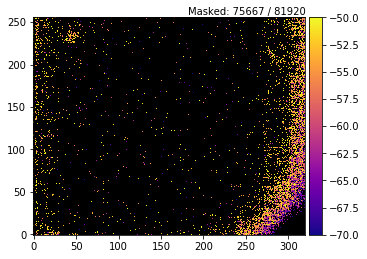

In [9]:
data_array.plot_array_heatmap_image()